In [7]:
import json
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
with open('../Results/resultsPython.json') as json_file:
    dataPython = json.load(json_file)

In [9]:
categories = pd.read_excel("../Sheets/Tasks_and_Tags.xlsx")

In [10]:
def getValues(language):
    dataPython={}
    if language == "Python":
        with open('../Results/resultsPython.json') as json_file:
            dataPython = json.load(json_file)
    if language=="Java":
        with open('../Results/resultsJava.json') as json_file:
            dataPython = json.load(json_file)
    if language == "C++":
        with open('../Results/resultsC.json') as json_file:
            dataPython = json.load(json_file)
    human={}
    human_time={}
    o1={}
    o1_time={}
    copilot={}
    copilot_time={}
    four_o={}
    four_o_time={}
    
    human_powermetrics={}
    human_powermetrics_time={}
    o1_powermetrics={}
    o1_powermetrics_time={}
    four_o_powermetrics={}
    four_o_powermetrics_time={}
    copilot_powermetrics={}
    copilot_powermetrics_time={}
    
    for task in dataPython.keys():
        mean_energy=np.mean(dataPython[task]["human"]["Energy Linux"]).item()
        mean_energy_o1=np.mean(dataPython[task]["o1"]["Energy Linux"]).item()
        mean_energy_4o=np.mean(dataPython[task]["4o"]["Energy Linux"]).item()
        mean_energy_copilot=np.mean(dataPython[task]["copilot"]["Energy Linux"]).item()
        mean_energy_powermetrics=np.mean(dataPython[task]["human"]["Energy"]).item()
        mean_energy_powermetrics_o1=np.mean(dataPython[task]["o1"]["Energy"]).item()
        mean_energy_powermetrics_4o=np.mean(dataPython[task]["4o"]["Energy"]).item()
        mean_energy_powermetrics_copilot=np.mean(dataPython[task]["copilot"]["Energy"]).item()
        
        
        
        if not np.isnan(mean_energy_powermetrics) and not np.isnan(mean_energy_powermetrics_o1) and not np.isnan(mean_energy_powermetrics_4o) and not np.isnan(mean_energy_powermetrics_copilot):
            human_powermetrics[task]=mean_energy_powermetrics
            human_powermetrics_time[task]=np.mean(dataPython[task]["human"]["Time"]).item()
        #if not np.isnan(mean_energy_powermetrics_o1) and not np.isnan(mean_energy_powermetrics):
            o1_powermetrics[task]=mean_energy_powermetrics_o1
            o1_powermetrics_time[task]=np.mean(dataPython[task]["o1"]["Time"]).item()
        #if not np.isnan(mean_energy_powermetrics_4o) and not np.isnan(mean_energy_powermetrics):
            four_o_powermetrics[task]=mean_energy_powermetrics_4o
            four_o_powermetrics_time[task]=np.mean(dataPython[task]["4o"]["Time"]).item()
        #if not np.isnan(mean_energy_powermetrics_copilot) and not np.isnan(mean_energy_powermetrics):
            copilot_powermetrics[task]=mean_energy_powermetrics_copilot
            copilot_powermetrics_time[task]=np.mean(dataPython[task]["copilot"]["Time"]).item()
            
        if mean_energy_o1>12 and mean_energy_copilot>12 and mean_energy_4o>12:
            human[task]=mean_energy
            human_time[task]=np.mean(dataPython[task]["human"]["Time Linux"]).item()
        #if mean_energy_o1>12 and mean_energy>12:
            o1[task]=mean_energy_o1
            o1_time[task]=np.mean(dataPython[task]["o1"]["Time Linux"]).item()
        #if mean_energy_copilot>12 and mean_energy>12:
            copilot[task]=mean_energy_copilot
            copilot_time[task]=np.mean(dataPython[task]["copilot"]["Time Linux"]).item()
        #if mean_energy_4o>12 and mean_energy>12:
            four_o[task]=mean_energy_4o
            four_o_time[task]=np.mean(dataPython[task]["4o"]["Time Linux"]).item()
    
    all_tags={}
    all_tags_time={}
    all_tags_o1={}
    all_tags_o1_time={}
    all_tags_copilot={}
    all_tags_copilot_time={}
    all_tags_4o={}
    all_tags_4o_time={}
    
    all_tags_powermetrics={}
    all_tags_powermetrics_time={}
    all_tags_o1_powermetrics={}
    all_tags_o1_powermetrics_time={}
    all_tags_4o_powermetrics={}
    all_tags_4o_powermetrics_time={}
    all_tags_copilot_powermetrics={}
    all_tags_copilot_powermetrics_time={}
    
    for task in categories["Name "]:
        name=task.replace(" ","_")
        tags=categories[categories["Name "]==task]["Tags "].to_list()[0].split(",")
        for t in tags:
            if t.strip() not in all_tags.keys():
                all_tags[t.strip()]=[]
                all_tags_time[t.strip()]=[]
            if name in human.keys():
                all_tags[t.strip()].append(human[name])  
                all_tags_time[t.strip()].append(human_time[name])
            if t.strip() not in all_tags_o1.keys():
                all_tags_o1[t.strip()]=[]
                all_tags_o1_time[t.strip()]=[]
            if name in o1.keys():
                all_tags_o1[t.strip()].append(o1[name])
                all_tags_o1_time[t.strip()].append(o1_time[name])
            if t.strip() not in all_tags_copilot.keys():
                all_tags_copilot[t.strip()]=[]
                all_tags_copilot_time[t.strip()]=[]
            if name in copilot.keys():
                all_tags_copilot[t.strip()].append(copilot[name])  
                all_tags_copilot_time[t.strip()].append(copilot_time[name])
            if t.strip() not in all_tags_4o.keys():
                all_tags_4o[t.strip()]=[]
                all_tags_4o_time[t.strip()]=[]
            if name in four_o.keys():
                all_tags_4o[t.strip()].append(four_o[name])
                all_tags_4o_time[t.strip()].append(four_o_time[name])
            
            if t.strip() not in all_tags_powermetrics.keys():
                all_tags_powermetrics[t.strip()]=[]
                all_tags_powermetrics_time[t.strip()]=[]
            if name in human_powermetrics.keys():
                all_tags_powermetrics[t.strip()].append(human_powermetrics[name])  
                all_tags_powermetrics_time[t.strip()].append(human_powermetrics_time[name])
            if t.strip() not in all_tags_o1_powermetrics.keys():
                all_tags_o1_powermetrics[t.strip()]=[]
                all_tags_o1_powermetrics_time[t.strip()]=[]
            if name in o1_powermetrics.keys():
                all_tags_o1_powermetrics[t.strip()].append(o1_powermetrics[name])
                all_tags_o1_powermetrics[t.strip()].append(o1_powermetrics_time[name])
            if t.strip() not in all_tags_4o_powermetrics.keys():
                all_tags_4o_powermetrics[t.strip()]=[]
                all_tags_4o_powermetrics_time[t.strip()]=[]
            if name in four_o_powermetrics.keys():
                all_tags_4o_powermetrics[t.strip()].append(four_o_powermetrics[name])
                all_tags_4o_powermetrics_time[t.strip()].append(four_o_powermetrics_time[name])
            if t.strip() not in all_tags_copilot_powermetrics.keys():
                all_tags_copilot_powermetrics[t.strip()]=[]
                all_tags_copilot_powermetrics_time[t.strip()]=[]
            if name in copilot_powermetrics.keys():
                all_tags_copilot_powermetrics[t.strip()].append(copilot_powermetrics[name])
                all_tags_copilot_powermetrics_time[t.strip()].append(copilot_powermetrics_time[name])
                
    for k in all_tags.keys():
        all_tags[k]=np.mean(all_tags[k]).item()
        all_tags_time[k]=np.mean(all_tags_time[k]).item()
    all_tags=dict(sorted(all_tags.items()))
    all_tags_time=dict(sorted(all_tags_time.items()))
    
    for k in all_tags_o1.keys():
        all_tags_o1[k]=np.mean(all_tags_o1[k]).item()
        all_tags_o1_time[k]=np.mean(all_tags_o1_time[k]).item()
    all_tags_o1=dict(sorted(all_tags_o1.items()))
    all_tags_o1_time=dict(sorted(all_tags_o1_time.items()))
    
    for k in all_tags_copilot.keys():
        all_tags_copilot[k]=np.mean(all_tags_copilot[k]).item()
        all_tags_copilot_time[k]=np.mean(all_tags_copilot_time[k]).item()
    all_tags_copilot=dict(sorted(all_tags_copilot.items()))
    all_tags_copilot_time=dict(sorted(all_tags_copilot_time.items()))
    
    for k in all_tags_4o.keys():
        all_tags_4o[k]=np.mean(all_tags_4o[k]).item()
        all_tags_4o_time[k]=np.mean(all_tags_4o_time[k]).item()
    all_tags_4o=dict(sorted(all_tags_4o.items()))
    all_tags_4o_time=dict(sorted(all_tags_4o_time.items()))
    
    for k in all_tags_powermetrics.keys():
        all_tags_powermetrics[k]=np.mean(all_tags_powermetrics[k]).item()
        all_tags_powermetrics_time[k]=np.mean(all_tags_powermetrics_time[k]).item()
    all_tags_powermetrics=dict(sorted(all_tags_powermetrics.items()))
    all_tags_powermetrics_time=dict(sorted(all_tags_powermetrics_time.items()))
    
    for k in all_tags_o1_powermetrics.keys():
        all_tags_o1_powermetrics[k]=np.mean(all_tags_o1_powermetrics[k]).item()
        all_tags_o1_powermetrics_time[k]=np.mean(all_tags_o1_powermetrics_time[k]).item()
    all_tags_o1_powermetrics=dict(sorted(all_tags_o1_powermetrics.items()))
    all_tags_o1_powermetrics_time=dict(sorted(all_tags_o1_powermetrics_time.items()))
    
    for k in all_tags_4o_powermetrics.keys():
        all_tags_4o_powermetrics[k]=np.mean(all_tags_4o_powermetrics[k]).item()
        all_tags_4o_powermetrics_time[k]=np.mean(all_tags_4o_powermetrics_time[k]).item()
    all_tags_4o_powermetrics=dict(sorted(all_tags_4o_powermetrics.items()))
    all_tags_4o_powermetrics_time=dict(sorted(all_tags_4o_powermetrics_time.items()))
    
    for k in all_tags_copilot_powermetrics.keys():
        all_tags_copilot_powermetrics[k]=np.mean(all_tags_copilot_powermetrics[k]).item()
        all_tags_copilot_powermetrics_time[k]=np.mean(all_tags_copilot_powermetrics_time[k]).item()
    all_tags_copilot_powermetrics=dict(sorted(all_tags_copilot_powermetrics.items()))
    all_tags_copilot_powermetrics_time=dict(sorted(all_tags_copilot_powermetrics_time.items()))
    return {"human": all_tags,
            "human_time": all_tags_time, 
            "o1": all_tags_o1,
            "o1_time": all_tags_o1_time,
            "copilot": all_tags_copilot,
            "copilot_time": all_tags_copilot_time,
            "4o": all_tags_4o,
            "4o_time": all_tags_4o_time, 
            "human_pw": all_tags_powermetrics,
            "human_pw_time": all_tags_powermetrics_time,
            "o1_pw": all_tags_o1_powermetrics,
            "o1_pw_time": all_tags_o1_powermetrics_time,
            "4o_pw": all_tags_4o_powermetrics,
            "4o_pw_time": all_tags_4o_powermetrics_time,
            "copilot_pw": all_tags_copilot_powermetrics,
            "copilot_pw_time": all_tags_copilot_powermetrics_time,}

In [11]:
all_tags_mapping={"Array": "linen", "Backtracking": "lightgreen", "Binary Search": "slategray", "Bit Manipulation": "lightpink", "Bitmask": "peru", "Breadth-First Search": "crimson", "Combinatorics": "peachpuff", "Counting": "darkseagreen", "Depth-First Search": "dodgerblue", "Divide and Conquer": "palevioletred", "Dynamic Programming": "saddlebrown", "Game Theory": "lawngreen", "Graph": "steelblue", "Greedy": "darkolivegreen", "Hash Function": "orchid", "Hash Table": "orangered", "Heap (Priority Queue)": "magenta", "Linked List": "coral", "Math": "blue", "Matrix": "purple", "Merge Sort": "red", "Monotonic Stack": "darkcyan", "Number Theory": "firebrick", "Ordered Set": "mediumorchid", "Prefix Sum": "teal", "Queue": "darkkhaki", "Recursion": "maroon", "Rolling Hash": "paleturquoise", "Segment Tree": "blueviolet", "Shortest Path": "gold", "Simulation": "darkgoldenrod", "Sliding Window": "rosybrown", "Sorting": "lightseagreen", "Stack": "orange", "String": "lime", "String Matching": "limegreen", "Suffix Array": "royalblue", "Tree": "cornflowerblue", "Trie": "tan", "Two Pointers": "dimgray"}

/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


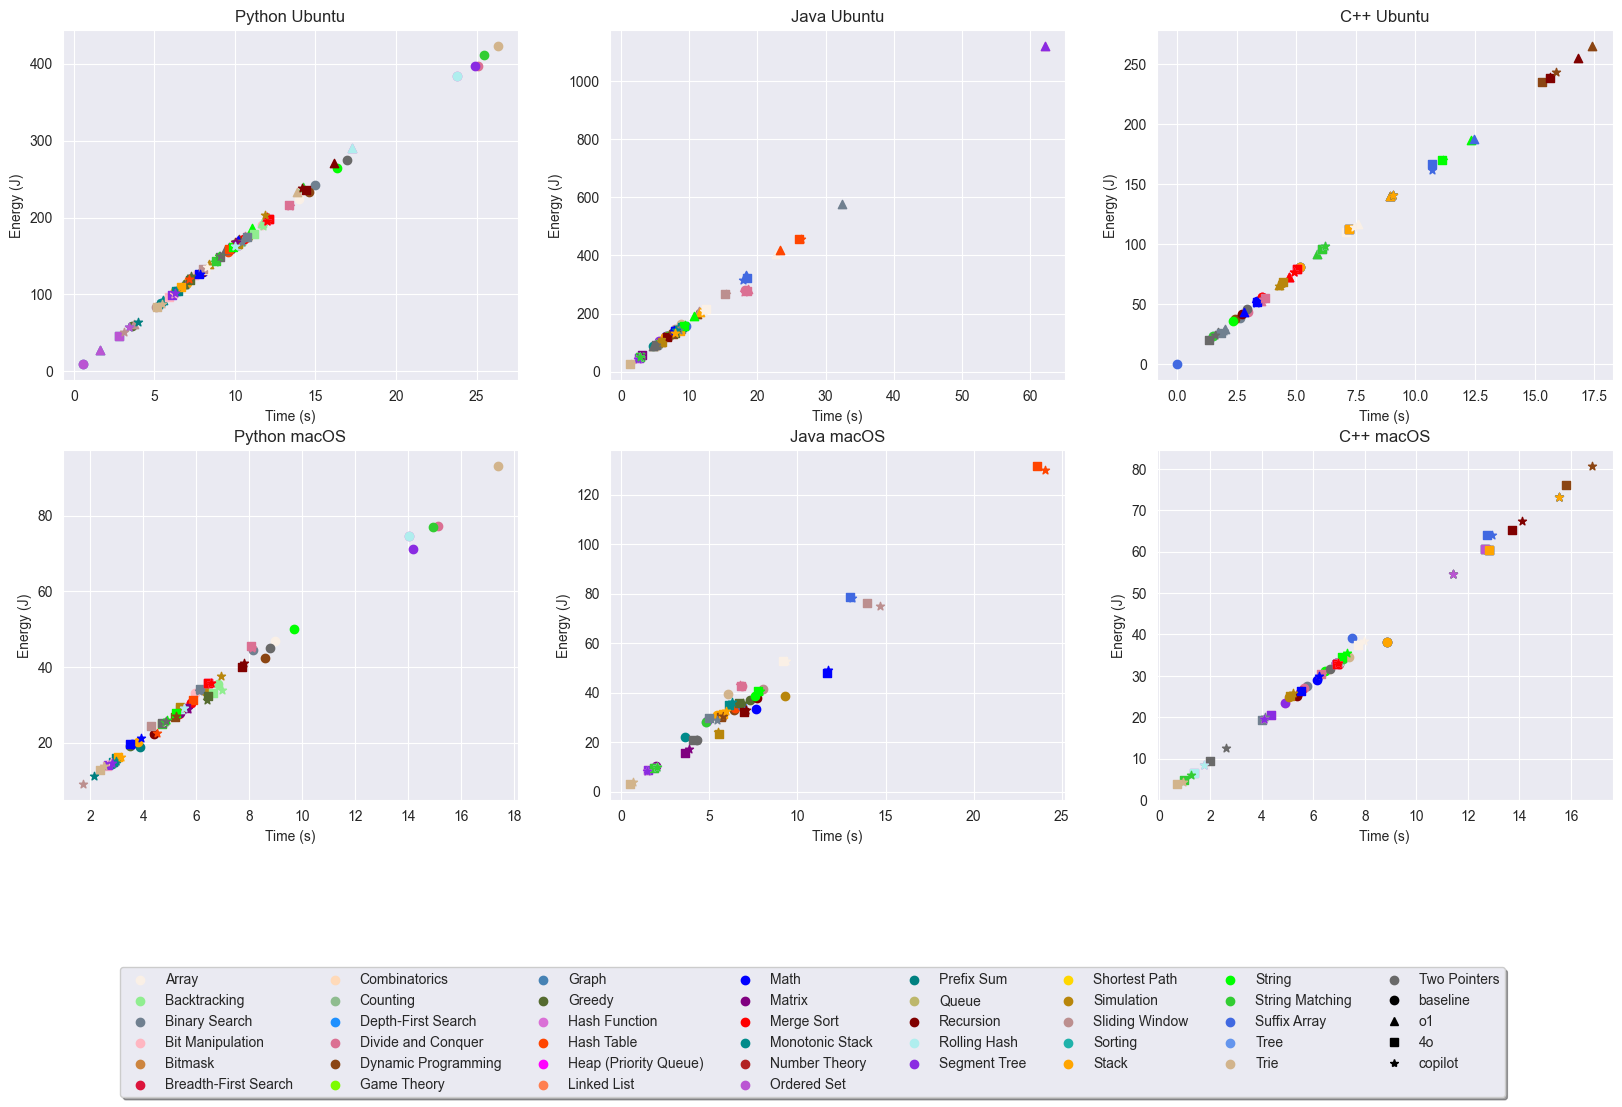

In [13]:
from matplotlib.lines import Line2D

fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20)
fig.set_figheight(10)
python_dic=getValues("Python")
for tag in python_dic["human"].keys():
    axs[0,0].scatter(python_dic["human_time"][tag], python_dic["human"][tag],color=all_tags_mapping[tag],marker='o', label=tag)

for tag in python_dic["o1"].keys():
    axs[0, 0].scatter(python_dic["o1_time"][tag], python_dic["o1"][tag],color=all_tags_mapping[tag],marker='^')

for tag in python_dic["4o"].keys():
    axs[0, 0].scatter(python_dic["4o_time"][tag], python_dic["4o"][tag],color=all_tags_mapping[tag],marker='s')
    
for tag in python_dic["copilot"].keys():
    axs[0, 0].scatter(python_dic["copilot_time"][tag], python_dic["copilot"][tag],color=all_tags_mapping[tag],marker='*')

for tag in python_dic["human_pw"].keys():
    axs[1,0].scatter(python_dic["human_pw_time"][tag], python_dic["human_pw"][tag],color=all_tags_mapping[tag],marker='o', label=tag)

for tag in python_dic["o1_pw"].keys():
    axs[1, 0].scatter(python_dic["o1_pw_time"][tag], python_dic["o1_pw"][tag],color=all_tags_mapping[tag],marker='^')

for tag in python_dic["4o_pw"].keys():
    axs[1, 0].scatter(python_dic["4o_pw_time"][tag], python_dic["4o_pw"][tag],color=all_tags_mapping[tag],marker='s')
    
for tag in python_dic["copilot_pw"].keys():
    axs[1, 0].scatter(python_dic["copilot_pw_time"][tag], python_dic["copilot_pw"][tag],color=all_tags_mapping[tag],marker='*')
    
python_dic=getValues("Java")
for tag in python_dic["human"].keys():
    axs[0, 1].scatter(python_dic["human_time"][tag], python_dic["human"][tag],color=all_tags_mapping[tag],marker='o')

for tag in python_dic["o1"].keys():
    axs[0, 1].scatter(python_dic["o1_time"][tag], python_dic["o1"][tag],color=all_tags_mapping[tag],marker='^')

for tag in python_dic["4o"].keys():
    axs[0,1].scatter(python_dic["4o_time"][tag], python_dic["4o"][tag],color=all_tags_mapping[tag],marker='s')
    
for tag in python_dic["copilot"].keys():
    axs[0,1].scatter(python_dic["copilot_time"][tag], python_dic["copilot"][tag],color=all_tags_mapping[tag],marker='*')

for tag in python_dic["human_pw"].keys():
    axs[1,1].scatter(python_dic["human_pw_time"][tag], python_dic["human_pw"][tag],color=all_tags_mapping[tag],marker='o', label=tag)

for tag in python_dic["o1_pw"].keys():
    axs[1, 1].scatter(python_dic["o1_pw_time"][tag], python_dic["o1_pw"][tag],color=all_tags_mapping[tag],marker='^')

for tag in python_dic["4o_pw"].keys():
    axs[1, 1].scatter(python_dic["4o_pw_time"][tag], python_dic["4o_pw"][tag],color=all_tags_mapping[tag],marker='s')
    
for tag in python_dic["copilot_pw"].keys():
    axs[1, 1].scatter(python_dic["copilot_pw_time"][tag], python_dic["copilot_pw"][tag],color=all_tags_mapping[tag],marker='*')
    
python_dic=getValues("C++")
for tag in python_dic["human"].keys():
    axs[0,2].scatter(python_dic["human_time"][tag], python_dic["human"][tag],color=all_tags_mapping[tag],marker='o')

for tag in python_dic["o1"].keys():
    axs[0,2].scatter(python_dic["o1_time"][tag], python_dic["o1"][tag],color=all_tags_mapping[tag],marker='^')

for tag in python_dic["4o"].keys():
    axs[0,2].scatter(python_dic["4o_time"][tag], python_dic["4o"][tag],color=all_tags_mapping[tag],marker='s')
    
for tag in python_dic["copilot"].keys():
    axs[0,2].scatter(python_dic["copilot_time"][tag], python_dic["copilot"][tag],color=all_tags_mapping[tag],marker='*')

for tag in python_dic["human_pw"].keys():
    axs[1,2].scatter(python_dic["human_pw_time"][tag], python_dic["human_pw"][tag],color=all_tags_mapping[tag],marker='o', label=tag)

for tag in python_dic["o1_pw"].keys():
    axs[1, 2].scatter(python_dic["o1_pw_time"][tag], python_dic["o1_pw"][tag],color=all_tags_mapping[tag],marker='^')

for tag in python_dic["4o_pw"].keys():
    axs[1, 2].scatter(python_dic["4o_pw_time"][tag], python_dic["4o_pw"][tag],color=all_tags_mapping[tag],marker='s')
    
for tag in python_dic["copilot_pw"].keys():
    axs[1, 2].scatter(python_dic["copilot_pw_time"][tag], python_dic["copilot_pw"][tag],color=all_tags_mapping[tag],marker='*')
    
#box = axs[0,0].get_position()
#axs[0,0].set_position([box.x0, box.y0 + box.height * 0.1,
                 #box.width, box.height * 0.9])

#box = axs[0, 1].get_position()
#axs[0,1].set_position([box.x0, box.y0 + box.height * 0.1,
                 #box.width, box.height * 0.9])

#box = axs[0,2].get_position()
#axs[0,2].set_position([box.x0, box.y0 + box.height * 0.1,
                 #box.width, box.height * 0.9])
axs[0,0].set_title('Python Ubuntu')
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Energy (J)')
axs[1, 0].set_title('Python macOS')
axs[1,0].set_xlabel('Time (s)')
axs[1,0].set_ylabel('Energy (J)')
axs[0,1].set_title('Java Ubuntu')
axs[1, 1].set_title('Java macOS')
axs[0,1].set_xlabel('Time (s)')
axs[1,1].set_xlabel('Time (s)')
axs[1,1].set_ylabel('Energy (J)')
axs[0, 1].set_ylabel('Energy (J)')
axs[0, 2].set_title('C++ Ubuntu')
axs[1, 2].set_title('C++ macOS')
axs[0, 2].set_xlabel('Time (s)')
axs[0, 2].set_ylabel('Energy (J)')
axs[1,2].set_xlabel('Time (s)')
axs[1,2].set_ylabel('Energy (J)')
handles, labels = axs[0,0].get_legend_handles_labels()
human_marker = Line2D([0], [0], label='baseline', color='black', marker='o', linestyle='')
four_o_marker = Line2D([0], [0], label='4o', color='black', marker='s', linestyle='')
copilot_marker = Line2D([0], [0], label='copilot', color='black', marker='*', linestyle='')
o1_marker = Line2D([0], [0], label='o1', color='black', marker='^', linestyle='')
handles.extend([human_marker, o1_marker, four_o_marker, copilot_marker])
# Put a legend below current axis
fig.legend(handles=handles,loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=8)
plt.show()
fig.savefig("FancyGraph.png", bbox_inches='tight', dpi=500)